In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from fbprophet import Prophet
import warnings
import logging

# Turn off pystan warnings
warnings.simplefilter("ignore", DeprecationWarning)
warnings.simplefilter("ignore", FutureWarning)

# Turn off fbprophet stdout logger
logging.getLogger('fbprophet').setLevel(logging.ERROR)

In [2]:
from matplotlib import pyplot as plt

In [3]:
df_dengue = pd.read_csv('../data/clean/dengue_cases.csv', index_col=0)
df_dengue

,Cases
2009-01-04,67.0
2009-01-11,50.0
2009-01-18,46.0
2009-01-25,67.0
2009-02-01,60.0
...,...
2017-11-26,20.0
2017-12-03,29.0
2017-12-10,29.0
2017-12-17,22.0


In [4]:
df_weather = pd.read_csv('../data/clean/weather_data.csv', header=[0,1], index_col=[0])
df_weather

RAINFALL                    TMAX  TMIN      TMEAN    RH        \
                min    max       mean   max   min       mean   min   max   
date                                                                       
2009-01-04      0.0    1.4   0.475000  31.7  23.6  27.775000  82.0  83.0   
2009-01-11      0.0   35.6  12.142857  33.0  23.5  28.385714  82.0  86.0   
2009-01-18      0.0   54.0  14.357143  30.7  22.3  25.771429  87.0  96.0   
2009-01-25      0.0   19.2   2.742857  33.0  23.7  28.385714  80.0  87.0   
2009-02-01      0.0   24.8   4.028571  33.0  23.3  28.100000  77.0  87.0   
...             ...    ...        ...   ...   ...        ...   ...   ...   
2017-11-26      0.0    9.8   3.257143  33.6  24.2  27.928571  74.0  89.0   
2017-12-03      0.0    0.4   0.057143  34.1  24.2  29.528571  74.0  80.0   
2017-12-10      0.0  109.8  24.342857  35.0  24.4  29.457143  72.0  81.0   
2017-12-17      0.0   31.0  10.142857  34.4  24.0  28.328571  68.0  89.0   
2017-12-24      0.0   39.4   6.128571  34.0  23.6  28.550000  70.0  86.0   

                      WIND SPEED  
                 mean       mean  
date                              
2009-01-04  82.750000   2.250000  
2009-01-11  83.857143   2.000000  
2009-01-18  90.428571   2.714286  
2009-01-25  83.428571   1.571429  
2009-02-01  82.285714   2.285714  
...               ...        ...  
2017-11-26  82.285714   1.714286  
2017-12-03  76.571429   2.142857  
2017-12-10  76.000000   1.857143  
2017-12-17  78.000000   1.285714  
2017-12-24  78.642857   1.857143  

[468 rows x 10 columns]

In [5]:
df_merged = pd.merge(df_dengue, df_weather, left_index=True, right_index=True)
df_merged.columns = ['Cases', 'RAINFALL min', 'RAINFALL max', 'RAINFALL mean', 'TMAX', 'TMIN', 'TMEAN', 'RH min', 'RH max',
                    'RH mean', 'WINDSPEED mean']
df_merged

C:\ProgramData\Miniconda3\lib\site-packages\pandas\core\reshape\merge.py:648: UserWarning: merging between different levels can give an unintended result (1 levels on the left,2 on the right)
  warnings.warn(msg, UserWarning)


,Cases,RAINFALL min,RAINFALL max,RAINFALL mean,TMAX,TMIN,TMEAN,RH min,RH max,RH mean,WINDSPEED mean
2009-01-04,67.0,0.0,1.4,0.475000,31.7,23.6,27.775000,82.0,83.0,82.750000,2.250000
2009-01-11,50.0,0.0,35.6,12.142857,33.0,23.5,28.385714,82.0,86.0,83.857143,2.000000
2009-01-18,46.0,0.0,54.0,14.357143,30.7,22.3,25.771429,87.0,96.0,90.428571,2.714286
2009-01-25,67.0,0.0,19.2,2.742857,33.0,23.7,28.385714,80.0,87.0,83.428571,1.571429
2009-02-01,60.0,0.0,24.8,4.028571,33.0,23.3,28.100000,77.0,87.0,82.285714,2.285714
...,...,...,...,...,...,...,...,...,...,...,...
2017-11-26,20.0,0.0,9.8,3.257143,33.6,24.2,27.928571,74.0,89.0,82.285714,1.714286
2017-12-03,29.0,0.0,0.4,0.057143,34.1,24.2,29.528571,74.0,80.0,76.571429,2.142857
2017-12-10,29.0,0.0,109.8,24.342857,35.0,24.4,29.457143,72.0,81.0,76.000000,1.857143
2017-12-17,22.0,0.0,31.0,10.142857,34.4,24.0,28.328571,68.0,89.0,78.000000,1.285714


In [6]:
df_merged.index = pd.to_datetime(df_merged.index)
# df_merged.index = df_merged.index.to_period('W')
df_merged

,Cases,RAINFALL min,RAINFALL max,RAINFALL mean,TMAX,TMIN,TMEAN,RH min,RH max,RH mean,WINDSPEED mean
2009-01-04,67.0,0.0,1.4,0.475000,31.7,23.6,27.775000,82.0,83.0,82.750000,2.250000
2009-01-11,50.0,0.0,35.6,12.142857,33.0,23.5,28.385714,82.0,86.0,83.857143,2.000000
2009-01-18,46.0,0.0,54.0,14.357143,30.7,22.3,25.771429,87.0,96.0,90.428571,2.714286
2009-01-25,67.0,0.0,19.2,2.742857,33.0,23.7,28.385714,80.0,87.0,83.428571,1.571429
2009-02-01,60.0,0.0,24.8,4.028571,33.0,23.3,28.100000,77.0,87.0,82.285714,2.285714
...,...,...,...,...,...,...,...,...,...,...,...
2017-11-26,20.0,0.0,9.8,3.257143,33.6,24.2,27.928571,74.0,89.0,82.285714,1.714286
2017-12-03,29.0,0.0,0.4,0.057143,34.1,24.2,29.528571,74.0,80.0,76.571429,2.142857
2017-12-10,29.0,0.0,109.8,24.342857,35.0,24.4,29.457143,72.0,81.0,76.000000,1.857143
2017-12-17,22.0,0.0,31.0,10.142857,34.4,24.0,28.328571,68.0,89.0,78.000000,1.285714


In [7]:
# drop RH min, RH max, TMAX, RAINFALL max, RAINFALL min when modelling
df_merged = df_merged.drop(['RH min', 'RH max', 'TMAX', 'RAINFALL max', 'RAINFALL min'], axis=1)
df_merged

,Cases,RAINFALL mean,TMIN,TMEAN,RH mean,WINDSPEED mean
2009-01-04,67.0,0.475000,23.6,27.775000,82.750000,2.250000
2009-01-11,50.0,12.142857,23.5,28.385714,83.857143,2.000000
2009-01-18,46.0,14.357143,22.3,25.771429,90.428571,2.714286
2009-01-25,67.0,2.742857,23.7,28.385714,83.428571,1.571429
2009-02-01,60.0,4.028571,23.3,28.100000,82.285714,2.285714
...,...,...,...,...,...,...
2017-11-26,20.0,3.257143,24.2,27.928571,82.285714,1.714286
2017-12-03,29.0,0.057143,24.2,29.528571,76.571429,2.142857
2017-12-10,29.0,24.342857,24.4,29.457143,76.000000,1.857143
2017-12-17,22.0,10.142857,24.0,28.328571,78.000000,1.285714


In [8]:
df_merged.reset_index()

,index,Cases,RAINFALL mean,TMIN,TMEAN,RH mean,WINDSPEED mean
0,2009-01-04,67.0,0.475000,23.6,27.775000,82.750000,2.250000
1,2009-01-11,50.0,12.142857,23.5,28.385714,83.857143,2.000000
2,2009-01-18,46.0,14.357143,22.3,25.771429,90.428571,2.714286
3,2009-01-25,67.0,2.742857,23.7,28.385714,83.428571,1.571429
4,2009-02-01,60.0,4.028571,23.3,28.100000,82.285714,2.285714
...,...,...,...,...,...,...,...
463,2017-11-26,20.0,3.257143,24.2,27.928571,82.285714,1.714286
464,2017-12-03,29.0,0.057143,24.2,29.528571,76.571429,2.142857
465,2017-12-10,29.0,24.342857,24.4,29.457143,76.000000,1.857143
466,2017-12-17,22.0,10.142857,24.0,28.328571,78.000000,1.285714


In [9]:
df = df_merged.reset_index()[['index', 'Cases']]
df.columns = ['ds', 'y']
# converting timezones (issue https://github.com/facebook/prophet/issues/831)
df['floor'] = 10
df['cap'] = 500
df

,ds,y,floor,cap
0,2009-01-04,67.0,10,500
1,2009-01-11,50.0,10,500
2,2009-01-18,46.0,10,500
3,2009-01-25,67.0,10,500
4,2009-02-01,60.0,10,500
...,...,...,...,...
463,2017-11-26,20.0,10,500
464,2017-12-03,29.0,10,500
465,2017-12-10,29.0,10,500
466,2017-12-17,22.0,10,500


In [10]:
split = int(len(df)*0.66)
train, test = df[:split], df[split:]
train.shape[0], test.shape[0]

(308, 160)

100%|██████████████████████████████| 160/160 [04:36<00:00,  1.73s/it]

rmse: 33.25570726619088


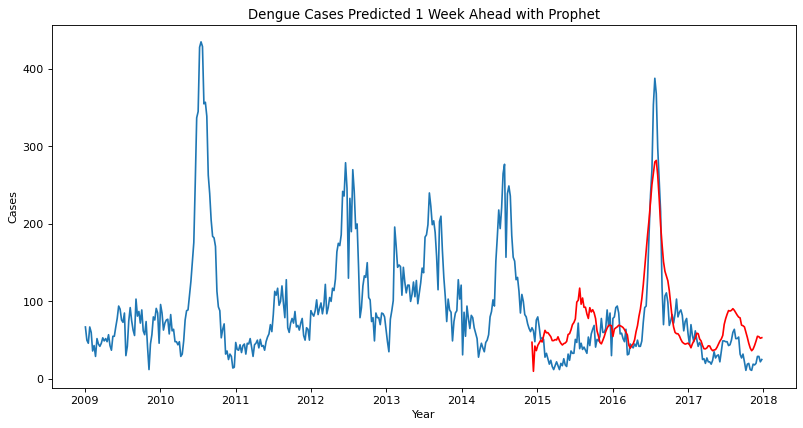

In [11]:
from tqdm import tqdm
from sklearn.metrics import mean_squared_error

n_weeks = 1

history = train.copy()
predictions = list()

for t in tqdm(range(len(test))):
    m = Prophet(growth='logistic',
        seasonality_mode='multiplicative', daily_seasonality=False, weekly_seasonality=False, yearly_seasonality=False
    ).add_seasonality(name='biyearly', period=730.5, fourier_order=15, prior_scale=25
    ).add_seasonality(name='yearly', period=365.25, fourier_order=5)
    m.fit(history)
    future = m.make_future_dataframe(periods=n_weeks, freq='W')
    future['floor'] = 10
    future['cap'] = 500
    forecast = m.predict(future)
    yhat = forecast[-1:]['yhat'].values[0]
    predictions.append(yhat)
    history = history.append(test.loc[len(train)+t])
pred = pd.DataFrame(predictions, index=pd.DatetimeIndex(test[n_weeks-1:]['ds']).union(pd.date_range(start='1/1/2018', periods=n_weeks-1, freq='W')))
rmse = np.sqrt(mean_squared_error(test['y'], predictions))
print(f'rmse: {rmse}')
plt.figure(figsize=(12, 6), dpi=80)
plt.title('Dengue Cases Predicted 1 Week Ahead with Prophet')
plt.xlabel('Year')
plt.ylabel('Cases')
plt.plot(df_merged['Cases'], color='C0')
plt.plot(pred, color='red')
plt.show()

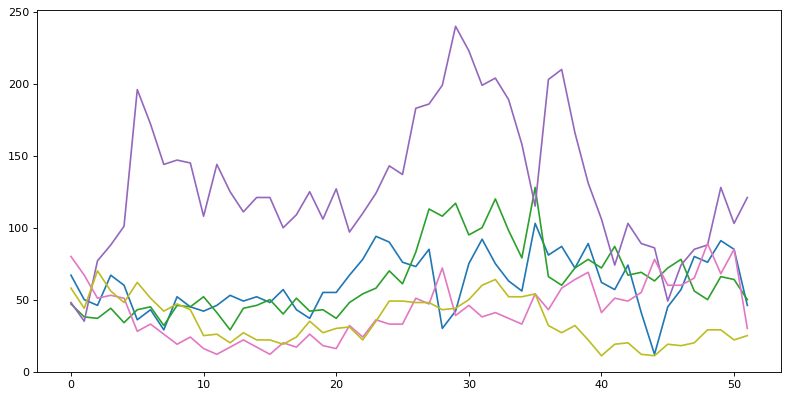

In [12]:
plt.figure(figsize=(12, 6), dpi=80)
plt.plot(df_merged[:52].reset_index()['Cases'], color='C0')
# plt.plot(df_merged[52:104].reset_index()['Cases'], color='C1')
plt.plot(df_merged[104:156].reset_index()['Cases'], color='C2')
# plt.plot(df_merged[156:208].reset_index()['Cases'], color='C3')
plt.plot(df_merged[208:260].reset_index()['Cases'], color='C4')
# plt.plot(df_merged[260:312].reset_index()['Cases'], color='C5')
plt.plot(df_merged[312:364].reset_index()['Cases'], color='C6')
# plt.plot(df_merged[364:416].reset_index()['Cases'], color='C7')
plt.plot(df_merged[416:468].reset_index()['Cases'], color='C8')

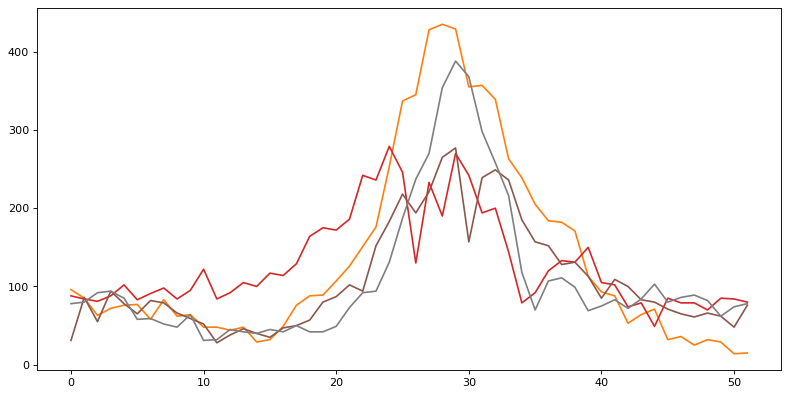

In [13]:
plt.figure(figsize=(12, 6), dpi=80)
# plt.plot(df_merged[:52].reset_index()['Cases'], color='C0')
plt.plot(df_merged[52:104].reset_index()['Cases'], color='C1')
# plt.plot(df_merged[104:156].reset_index()['Cases'], color='C2')
plt.plot(df_merged[156:208].reset_index()['Cases'], color='C3')
# plt.plot(df_merged[208:260].reset_index()['Cases'], color='C4')
plt.plot(df_merged[260:312].reset_index()['Cases'], color='C5')
# plt.plot(df_merged[312:364].reset_index()['Cases'], color='C6')
plt.plot(df_merged[364:416].reset_index()['Cases'], color='C7')
# plt.plot(df_merged[416:468].reset_index()['Cases'], color='C8')

100%|██████████████████████████████| 160/160 [04:33<00:00,  1.71s/it]

rmse: 48.14180502101209


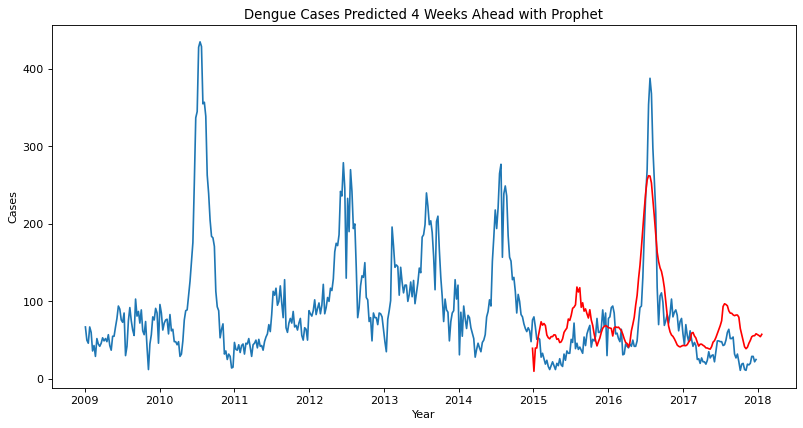

In [15]:
n_weeks = 4

history = train.copy()
predictions = list()

for t in tqdm(range(len(test))):
    m = Prophet(growth='logistic',
        seasonality_mode='multiplicative', daily_seasonality=False, weekly_seasonality=False, yearly_seasonality=False
    ).add_seasonality(name='biyearly', period=730.5, fourier_order=15, prior_scale=25
    ).add_seasonality(name='yearly', period=365.25, fourier_order=5)
    m.fit(history)
    future = m.make_future_dataframe(periods=n_weeks, freq='W')
    future['floor'] = 10
    future['cap'] = 500
    forecast = m.predict(future)
    yhat = forecast[-1:]['yhat'].values[0]
    predictions.append(yhat)
    history = history.append(test.loc[len(train)+t])
pred = pd.DataFrame(predictions, index=pd.DatetimeIndex(test[n_weeks-1:]['ds']).union(pd.date_range(start='1/1/2018', periods=n_weeks-1, freq='W')))
rmse = np.sqrt(mean_squared_error(test['y'], predictions))
print(f'rmse: {rmse}')
plt.figure(figsize=(12, 6), dpi=80)
plt.title('Dengue Cases Predicted 4 Weeks Ahead with Prophet')
plt.xlabel('Year')
plt.ylabel('Cases')
plt.plot(df_merged['Cases'], color='C0')
plt.plot(pred, color='red')
plt.show()

100%|██████████████████████████████| 160/160 [04:35<00:00,  1.72s/it]

rmse: 77.81631422355609


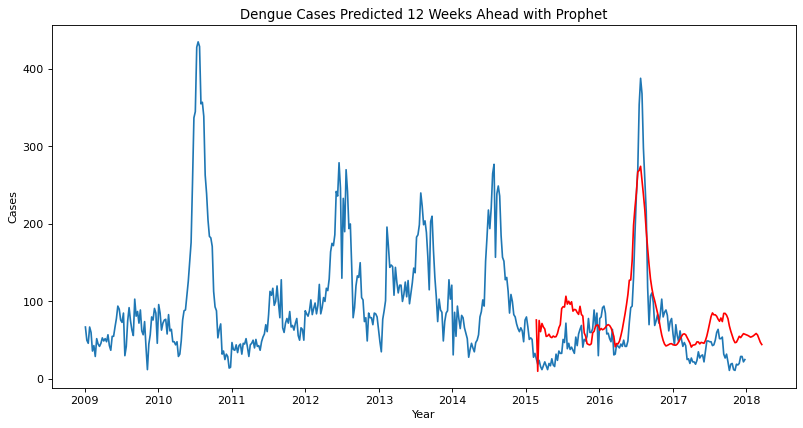

In [16]:
n_weeks = 12

history = train.copy()
predictions = list()

for t in tqdm(range(len(test))):
    m = Prophet(growth='logistic',
        seasonality_mode='multiplicative', daily_seasonality=False, weekly_seasonality=False, yearly_seasonality=False
    ).add_seasonality(name='biyearly', period=730.5, fourier_order=10, prior_scale=25
    ).add_seasonality(name='yearly', period=365.25, fourier_order=5)
    m.fit(history)
    future = m.make_future_dataframe(periods=n_weeks, freq='W')
    future['floor'] = 10
    future['cap'] = 500
    forecast = m.predict(future)
    yhat = forecast[-1:]['yhat'].values[0]
    predictions.append(yhat)
    history = history.append(test.loc[len(train)+t])
pred = pd.DataFrame(predictions, index=pd.DatetimeIndex(test[n_weeks-1:]['ds']).union(pd.date_range(start='1/1/2018', periods=n_weeks-1, freq='W')))
rmse = np.sqrt(mean_squared_error(test['y'], predictions))
print(f'rmse: {rmse}')
plt.figure(figsize=(12, 6), dpi=80)
plt.title('Dengue Cases Predicted 12 Weeks Ahead with Prophet')
plt.xlabel('Year')
plt.ylabel('Cases')
plt.plot(df_merged['Cases'], color='C0')
plt.plot(pred, color='red')
plt.show()

In [ ]:
m.plot_components(forecast)

## References:
- https://www.kaggle.com/kashnitsky/topic-9-part-2-time-series-with-facebook-prophet